In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [3]:
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [58]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [59]:
app_test = pd.read_csv(DATASET_DIR / "application_test.csv")
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")

In [60]:
income = app_train[["TARGET","AMT_INCOME_TOTAL"]].copy()
income = income.sort_values(by=["AMT_INCOME_TOTAL"])
income = income[(income["AMT_INCOME_TOTAL"] >= income["AMT_INCOME_TOTAL"].quantile(0.25)) & (income["AMT_INCOME_TOTAL"] <= income["AMT_INCOME_TOTAL"].quantile(0.75))]
#income[0:10]

In [61]:
y = income["TARGET"]
x = income.drop(["TARGET"], axis=1)

In [62]:
# logistisches Regressionsmodell
model = LogisticRegression()

In [63]:
model.fit(x,y)

LogisticRegression()

In [64]:
p = model.predict_proba(x)[:,1]

(112500.0, 202500.0)

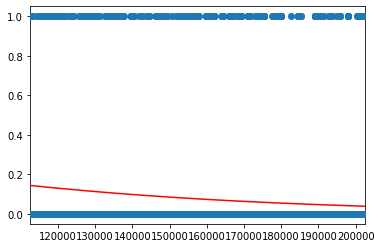

In [80]:
plt.scatter(x, y, zorder=20)
plt.plot(x,p,"r",zorder=20)
plt.xlim(income["AMT_INCOME_TOTAL"].min(),income["AMT_INCOME_TOTAL"].max())

1 = Kreditausfall

2 = Kreditrückzahlung

Je höher das Einkommen, desto niedriger ist die Kredieausfallwahrscheinlichkeit.

In [79]:
model.coef_[0]

array([-0.00001584])

In [67]:
model.intercept_

array([-0.])

In [76]:
model.predict_proba([[income["AMT_INCOME_TOTAL"].min()]])[:,1][0]

0.1440282126451731

Regressionsfunktion: 
-0,00001584x+0,144

In [81]:
model.predict_proba([[income["AMT_INCOME_TOTAL"].max()]])[:,1][0]*100

3.886537308109535

Wahrscheinlichkeit, dass ein Kreditnehmer mit dem höchsten Einkommen ausfällt: 3.89%

In [82]:
model.predict_proba([[income["AMT_INCOME_TOTAL"].min()]])[:,1][0]*100

14.40282126451731

Wahrscheinlichkeit, dass ein Kreditnehmer mit dem niedrigsten Einkommen ausfällt: 14,4%